In [2]:
# import numpy as np
# import os
# import pandas as pd
# import xarray as xr
# import rioxarray
# from matplotlib import pyplot as plt
# import seaborn as sns
import codebase
from codebase import ml_pipeline

In [7]:
from tensorflow.keras import models
from numpy import array_equal
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Input
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import RepeatVector

## Testing out functions

- below Hoover Dam: 4152103
- Lee's Ferry: 4152450
- US-Mexico border: 4152050
- upstream of Lake Powell (San Juan River trib): 4152600

In [3]:
input_combos = [('Powell', 'glen canyon', 4152600),
                ('Powell', 'glen canyon', 4152450),
                ('Mead', 'hoover', 4152103),
                ('Mead', 'hoover', 4152050)]

In [5]:
res_name , dam_name, grdc_id = input_combos[0]

n_epochs = 300

In [4]:
all_data = ml_pipeline.LSTM_preprocessing(res_name = res_name,
                                          dam_name = dam_name,
                                          grdc_id = grdc_id)

ERROR 1: PROJ: proj_create_from_database: Open of /global/home/users/ann_scheliga/.conda/envs/rio_keras/share/proj failed


Grabbed lat/lon dims. Consider reprojecting!
Grabbed lat/lon dims. Consider reprojecting!
Grabbed lat/lon dims. Consider reprojecting!
Grabbed lat/lon dims. Consider reprojecting!
Grabbed lat/lon dims. Consider reprojecting!
Projected to equal area
Grabbed lat/lon dims. Consider reprojecting!
Grabbed lat/lon dims. Consider reprojecting!
Grabbed lat/lon dims. Consider reprojecting!
Grabbed lat/lon dims. Consider reprojecting!
Grabbed lat/lon dims. Consider reprojecting!
Projected to equal area


In [8]:
X_train, X_test, y_train, y_test = ml_pipeline.split_data_and_reshape(all_data)
X_met_train, X_met_test =ml_pipeline.met_split(X_train, X_test)

X train shape: (1, 910, 3); y train shape: (1, 910, 1)
X test shape: (1, 910, 3); y test shape: (1, 910, 1)


In [9]:
n_timesteps_in = X_train.shape[-2]
n_features = X_train.shape[-1]
n_timesteps_out = 1

In [12]:
def make_LSTM_model(n_timesteps_in,n_features):
    model = Sequential()
    model.add(Input(shape=(n_timesteps_in,n_features)))
    # model.add(Dense(128, activation='sigmoid'))
    model.add(LSTM(150,dropout=0.2))
    model.add(RepeatVector(n_timesteps_in))
    model.add(LSTM(150, return_sequences=False))
    # model.add(TimeDistributed(Dense(n_features, activation='softmax')))
    
    model.add(Dense(n_timesteps_in, activation= "relu"))
    model.compile(loss='MeanSquaredError', optimizer='adam', 
                  metrics=['MeanAbsoluteError'])
    print(model.summary())
    return model

In [13]:
model_nw = make_LSTM_model(n_timesteps_in,2)
model_nw_history = model_nw.fit(X_met_train, y_train, epochs=n_epochs, batch_size=38,validation_data=(X_met_test, y_test))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 150)            │        91,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_1 (RepeatVector)  │ (None, 910, 150)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 150)            │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 910)            │       137,410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,810 (1.56 MB)

 Trainable params: 409,810 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - MeanSquaredError: 2596.0635 - loss: 2596.0635 - val_MeanSquaredError: 3347.9250 - val_loss: 3347.9250
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step - MeanSquaredError: 2593.7034 - loss: 2593.7034 - val_MeanSquaredError: 3344.9224 - val_loss: 3344.9224
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - MeanSquaredError: 2590.1406 - loss: 2590.1406 - val_MeanSquaredError: 3341.3918 - val_loss: 3341.3918
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - MeanSquaredError: 2586.3931 - loss: 2586.3931 - val_MeanSquaredError: 3337.1997 - val_loss: 3337.1997
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step - MeanSquaredError: 2582.1177 - loss: 2582.1177 - val_MeanSquaredError: 3332.4861 - val_loss: 3332.4861
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - MeanSquaredError: 2577.4368 - loss: 2577.4368 - val_MeanSquaredError: 3327.3447 - val_loss: 3327.3447
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - MeanSquaredError: 2597.8052

In [14]:
model_sw = make_LSTM_model(n_timesteps_in, 3)
model_sw_history = model_sw.fit(X_train, y_train, epochs=n_epochs, batch_size=38,validation_data=(X_test, y_test))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 150)            │        92,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_2 (RepeatVector)  │ (None, 910, 150)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 150)            │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 910)            │       137,410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 410,410 (1.57 MB)

 Trainable params: 410,410 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - MeanSquaredError: 2596.3618 - loss: 2596.3618 - val_MeanSquaredError: 3348.4060 - val_loss: 3348.4060
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step - MeanSquaredError: 2595.8792 - loss: 2595.8792 - val_MeanSquaredError: 3346.8098 - val_loss: 3346.8098
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step - MeanSquaredError: 2592.0088 - loss: 2592.0088 - val_MeanSquaredError: 3343.8953 - val_loss: 3343.8953
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - MeanSquaredError: 2588.8625 - loss: 2588.8625 - val_MeanSquaredError: 3339.5742 - val_loss: 3339.5742
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step - MeanSquaredError: 2584.7866 - loss: 2584.7866 - val_MeanSquaredError: 3334.3101 - val_loss: 3334.3101
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - MeanSquaredError: 2580.0957 - loss: 2580.0957 - val_MeanSquaredError: 3328.8008 - val_loss: 3328.8008
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step - MeanSquaredError: 258

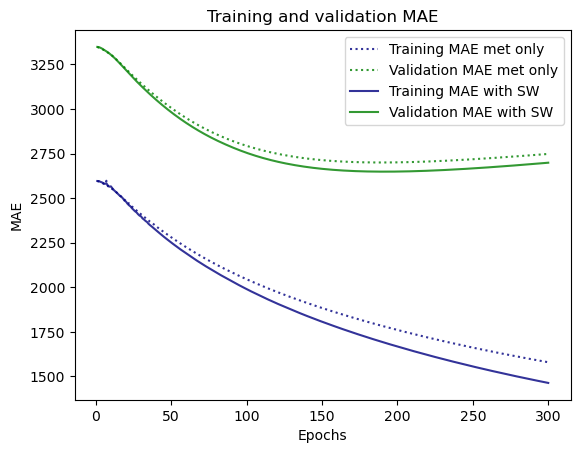

In [16]:
ml_pipeline.compare_epoch_error(model_nw_history.history,model_sw_history.history,fig_name='Mead_using_Powell')

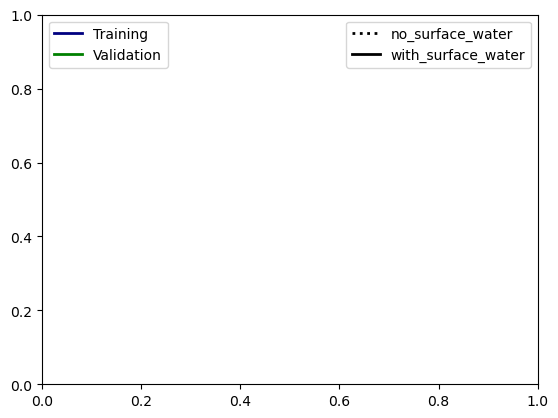

In [27]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

color_lines = [Line2D([0], [0], color='navy', lw=2),
                Line2D([0], [0], color='green', lw=2)]
style_lines = [Line2D([0], [0], color='black',linestyle=':', lw=2),
                Line2D([0], [0], color='black',linestyle='-', lw=2)]
fig, ax = plt.subplots()
color_legend = plt.legend(color_lines, ['Training', 'Validation'],loc='upper left')
ax.legend(style_lines, ['no_surface_water', 'with_surface_water'],loc='upper right')
plt.gca().add_artist(color_legend)